# Image Processing

## Importing Libraries

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import pytesseract

In [5]:
from PIL import Image
pytesseract.pytesseract.tesseract_cmd = (r'C:\Program Files (x86)\Tesseract-OCR\tesseract.exe')

## Image Preprocessing

## Displaying Original Image

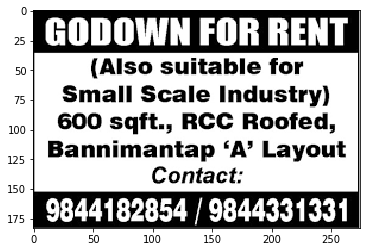

In [9]:
#im = Image.open('/RJHkk.png')
img = cv2.imread('01.png')

kernel = np.ones((1, 1), np.uint8)
img = cv2.dilate(img, kernel, iterations=1)
img = cv2.erode(img, kernel, iterations=1)
plt.imshow(img)

## Converting image to text

In [10]:
text = pytesseract.image_to_string(img)
print(text)

IIIIIIIIWII FIIB IIEIIT
(Also suitable [or
Small Scale Industry)
600 sqlt., RCC Rooted,

Bannimantap ‘A’ Layout
Contact:

98441 82854 I 9844331331


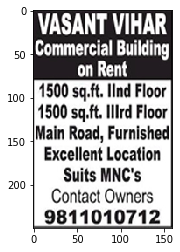

In [11]:
img = cv2.imread('02.jpg')

kernel = np.ones((1, 1), np.uint8)
img = cv2.dilate(img, kernel, iterations=1)
img = cv2.erode(img, kernel, iterations=1)
plt.imshow(img)

In [12]:
text = pytesseract.image_to_string(img)
print(text)

VASANT VIHAR
Commercial Building
on lien!

1500 sq.it. llnd Floor
1500 sq.f!. lllrd Floor

Main Road, Furnished
Excellent Location
Suits MNC's
Contact Owners
981 1 01 07 1 2


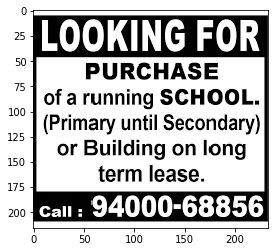

In [14]:
img = cv2.imread('03.png')

kernel = np.ones((1, 1), np.uint8)
img = cv2.dilate(img, kernel, iterations=1)
img = cv2.erode(img, kernel, iterations=1)
plt.imshow(img)

In [15]:
text = pytesseract.image_to_string(img)
print(text)

LOOKING FOR

PURCHASE
ofa running SCHOOL.

(Primary until Secondary)
or Building on long
term lease.

 

c.u= 94000-68856


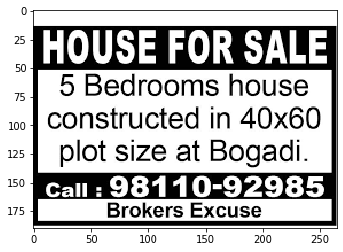

In [16]:
img = cv2.imread('04.png')

kernel = np.ones((1, 1), np.uint8)
img = cv2.dilate(img, kernel, iterations=1)
img = cv2.erode(img, kernel, iterations=1)
plt.imshow(img)

In [17]:
text = pytesseract.image_to_string(img)
print(text)

HOUSE FOR SALE

5 Bedrooms house
constructed in 40x60

plot size at Bogadi.
Call : 981 1 0-92985

Brokers Excuse


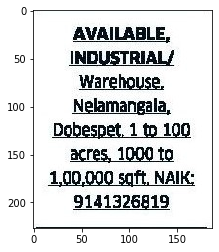

In [18]:
img = cv2.imread('im_crop.jpg')

kernel = np.ones((1, 1), np.uint8)
img = cv2.dilate(img, kernel, iterations=1)
img = cv2.erode(img, kernel, iterations=1)
plt.imshow(img)

True

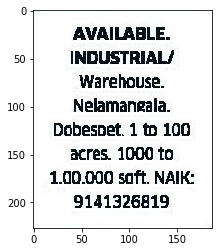

In [23]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('im_crop.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Remove horizontal
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25,1))
detected_lines = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
cnts = cv2.findContours(detected_lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(image, [c], -1, (255,255,255), 2)

# Repair image
repair_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,6))
result = 255 - cv2.morphologyEx(255 - image, cv2.MORPH_CLOSE, repair_kernel, iterations=1)

#plt.imshow(thresh)
#plt.imshow(detected_lines)
plt.imshow(image)
#plt.imshow(result)
cv2.imwrite('result.jpg',image)

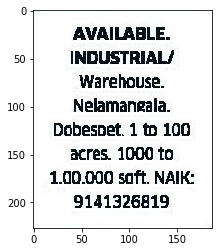

In [24]:
kernel = np.ones((1, 1), np.uint8)
img = cv2.dilate(image, kernel, iterations=1)
img = cv2.erode(img, kernel, iterations=1)
plt.imshow(img)

In [29]:
text = pytesseract.image_to_string(img)
print(text)

AVAILABLE.
INDUSTRIAL]
warehnuse.
Nelamanzala.
Dnbesnet. 1 no 100
acres 1000 tn
1.00.000 saft. NAIK:
9141326319


## Converting Image to Grayscale

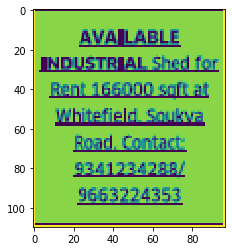

In [9]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #Grey scale
plt.imshow(gray)

## Converting image to text

In [7]:
text = pytesseract.image_to_string(img)
print(text)

## Converting image to black and white

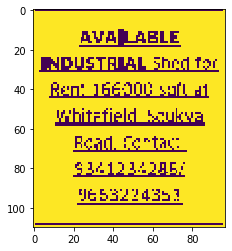

In [8]:
thresh = 128

# threshold the image
img_binary = cv2.threshold(gray, thresh, 255, cv2.THRESH_BINARY)[1]
plt.imshow(img_binary)

## Converting image to text

In [18]:
text = pytesseract.image_to_string(img_binary)
print(text)

AVAHABLE
Iunusgmggz
ﬂiﬂﬂmﬁh
Nglamanggla
D 1 1

ﬁmiimlliu

1 NAI '

9141326§19


## Gaussian Filtering

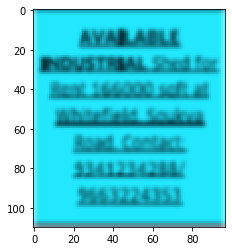

In [10]:
blur = cv2.GaussianBlur(img,(5,5),0) #Gaussian Filtering
plt.imshow(blur)

## Converting image to text

In [35]:
text = pytesseract.image_to_string(blur)
print(text)

### No text displayed after Gaussian Filtering so discard it.

## Upscaling

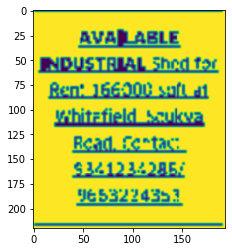

In [11]:
# UPSCALING
larger=cv2.pyrUp(img_binary)
plt.imshow(larger)

## Checking Text after Upscaling

In [39]:
text = pytesseract.image_to_string(dilation)
print(text)

AVAILABLE,
INDUSTRIAL]
warehouse,
Nelamangala,
DOUe5D9\ 1 W 100
BUE3, 1000 [0

1,130,000 Wﬂ, NA|K'

9141326319


## Performing Dilation on image

In [16]:
kernel = np.ones((2,2),np.uint8)
dilation = cv2.dilate(img,kernel,iterations = 1)

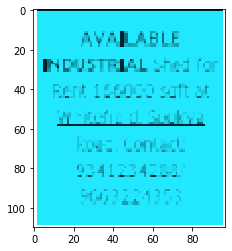

In [17]:
plt.imshow(dilation)

## Checking Text after Dilation

In [21]:
text = pytesseract.image_to_string(dilation)
print(text)

AVAILABLE,
INDUSTRIAL]
warehouse,
Nelamangala,
DOUe5D9\ 1 W 100
BUE3, 1000 [0

1,130,000 Wﬂ, NA|K'

9141326319


### Output displayed is really good.
### Now we will use other technique to enhance the content displayed by image. One such technique is EAST Neural Network.

# EAST Neural Network

## Using a already trained model to build bounding boxes

In [ ]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('1.PNG')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Remove horizontal
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25,1))
detected_lines = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
cnts = cv2.findContours(detected_lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(image, [c], -1, (255,255,255), 2)

# Repair image
repair_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,6))
result = 255 - cv2.morphologyEx(255 - image, cv2.MORPH_CLOSE, repair_kernel, iterations=1)

#plt.imshow(thresh)
#plt.imshow(detected_lines)
plt.imshow(image)
#plt.imshow(result)
cv2.imwrite('result.jpg',image)

In [24]:
net = cv2.dnn.readNet("frozen_east_text_detection.pb")   #This is the model we get after extraction
frame = cv2.imread('result.jpg')
inpWidth = inpHeight = 320  # A default dimension
# Preparing a blob to pass the image through the neural network
# Subtracting mean values used while training the model.
image_blob = cv2.dnn.blobFromImage(frame, 1.0, (inpWidth, inpHeight), (123.68, 116.78, 103.94), True, False)

In [25]:
output_layer = []
output_layer.append("feature_fusion/Conv_7/Sigmoid")
output_layer.append("feature_fusion/concat_3")

In [26]:
net.setInput(image_blob)
output = net.forward(output_layer)
scores = output[0]
geometry = output[1]

In [27]:
def decode(scores, geometry, scoreThresh):
    detections = []
    confidences = []

    ############ CHECK DIMENSIONS AND SHAPES OF geometry AND scores ############
    assert len(scores.shape) == 4, "Incorrect dimensions of scores"
    assert len(geometry.shape) == 4, "Incorrect dimensions of geometry"
    assert scores.shape[0] == 1, "Invalid dimensions of scores"
    assert geometry.shape[0] == 1, "Invalid dimensions of geometry"
    assert scores.shape[1] == 1, "Invalid dimensions of scores"
    assert geometry.shape[1] == 5, "Invalid dimensions of geometry"
    assert scores.shape[2] == geometry.shape[2], "Invalid dimensions of scores and geometry"
    assert scores.shape[3] == geometry.shape[3], "Invalid dimensions of scores and geometry"
    height = scores.shape[2]
    width = scores.shape[3]
    for y in range(0, height):

        # Extract data from scores
        scoresData = scores[0][0][y]
        x0_data = geometry[0][0][y]
        x1_data = geometry[0][1][y]
        x2_data = geometry[0][2][y]
        x3_data = geometry[0][3][y]
        anglesData = geometry[0][4][y]
        for x in range(0, width):
            score = scoresData[x]

            # If score is lower than threshold score, move to next x
            if (score < scoreThresh):
                continue

            # Calculate offset
            offsetX = x * 4.0
            offsetY = y * 4.0
            angle = anglesData[x]

            # Calculate cos and sin of angle
            cosA = math.cos(angle)
            sinA = math.sin(angle)
            h = x0_data[x] + x2_data[x]
            w = x1_data[x] + x3_data[x]

            # Calculate offset
            offset = ([offsetX + cosA * x1_data[x] + sinA * x2_data[x], offsetY - sinA * x1_data[x] + cosA * x2_data[x]])

            # Find points for rectangle
            p1 = (-sinA * h + offset[0], -cosA * h + offset[1])
            p3 = (-cosA * w + offset[0], sinA * w + offset[1])
            center = (0.5 * (p1[0] + p3[0]), 0.5 * (p1[1] + p3[1]))
            detections.append((center, (w, h), -1 * angle * 180.0 / math.pi))
            confidences.append(float(score))

    # Return detections and confidences
    return [detections, confidences]

In [30]:
confThreshold = 0.5
nmsThreshold = 0.3
[boxes, confidences] = decode(scores, geometry, confThreshold)
indices = cv2.dnn.NMSBoxesRotated(boxes, confidences, confThreshold, nmsThreshold)

In [31]:
height_ = frame.shape[0]
width_ = frame.shape[1]
rW = width_ / float(inpWidth)
rH = height_ / float(inpHeight)

for i in indices:
    # get 4 corners of the rotated rect
    vertices = cv2.boxPoints(boxes[i[0]])
    # scale the bounding box coordinates based on the respective ratios
    for j in range(4):
        vertices[j][0] *= rW
        vertices[j][1] *= rH
    for j in range(4):
        p1 = (vertices[j][0], vertices[j][1])
        p2 = (vertices[(j + 1) % 4][0], vertices[(j + 1) % 4][1])
        cv2.line(frame, p1, p2, (255, 168, 168), thickness=2)

# To save the image:
cv2.imwrite("bounding box.jpg", frame)

True

## Original image vs Image with bounding boxes

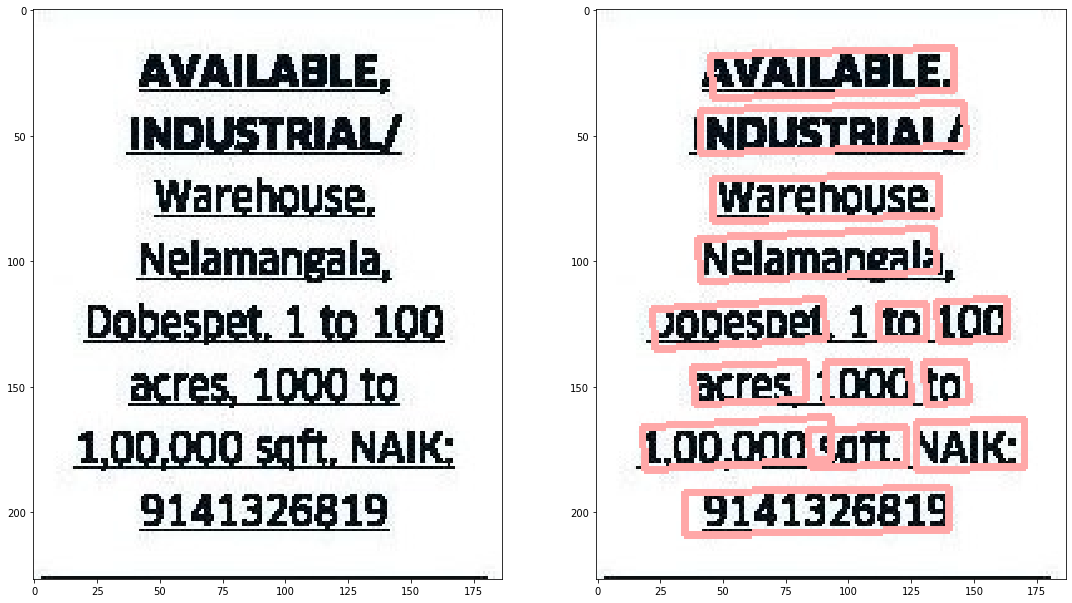

In [32]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
axes = fig.subplots(nrows=1, ncols=2)
axes[0].imshow(img)
axes[1].imshow(frame)